    Jacob Knopping
    3/23/2020

### 31.4 Challenge

Do a little scraping or API-calling of your own.  Pick a new website and see what you can get out of it.  Expect that you'll run into bugs and blind alleys, and rely on your mentor to help you get through.  

Formally, your goal is to write a scraper that will:

1) Return specific pieces of information (rather than just downloading a whole page)  
2) Iterate over multiple pages/queries  
3) Save the data to your computer  

Once you have your data, compute some statistical summaries and/or visualizations that give you some new insights into your scraping topic of interest.  Write up a report from scraping code to summary and share it with your mentor.

https://www.analyticsvidhya.com/blog/2017/07/web-scraping-in-python-using-scrapy/

In [2]:
import scrapy
import re
from scrapy.crawler import CrawlerProcess

class TechcrunchSpider(scrapy.Spider):
    #name of the spider
    name = 'techcrunch'

    #starting url for scraping
    start_urls = ['http://techcrunch.com/feed/']


    def parse(self, response):
        #Remove XML namespaces
        response.selector.remove_namespaces()

        #Extract article information
        titles = response.xpath('//item/title/text()').extract()
        authors = response.xpath('//item/creator/text()').extract()
        dates = response.xpath('//item/pubDate/text()').extract()
        links = response.xpath('//item/link/text()').extract()

        for item in zip(titles,authors,dates,links):
            scraped_info = {
                'title' : item[0],
                'author' : item[1],
                'publish_date' : item[2],
                'link' : item[3]
            }

            yield scraped_info
 
    
process = CrawlerProcess({
    'FEED_FORMAT': 'json',         # Store data in JSON format.
    'FEED_URI': 'techcrunch.json',       # Name our storage file.
    'LOG_ENABLED': False,          # Turn off logging for now.
    'ROBOTSTXT_OBEY': True,
    'USER_AGENT': 'ThinkfulDataScienceBootcampCrawler (thinkful.com)',
    'AUTOTHROTTLE_ENABLED': True,
    'HTTPCACHE_ENABLED': True
})


process.crawl(TechcrunchSpider)
process.start()
print('Success!')

Success!


In [3]:
import pandas as pd

# Checking whether we got data from all 9 pages
techCrunch_df = pd.read_json('techcrunch.json', orient='records')
techCrunch_df.head()

,title,author,publish_date,link
0,Streaming service fuboTV to merge with virtual...,Sarah Perez,"Mon, 23 Mar 2020 18:37:21 +0000",https://techcrunch.com/2020/03/23/streaming-se...
1,SouSmile raises $10M to grow its anti-braces a...,Anna Escher,"Mon, 23 Mar 2020 18:32:43 +0000",https://techcrunch.com/2020/03/23/sousmile-rai...
2,VidCon joins the list of events canceled by CO...,Jonathan Shieber,"Mon, 23 Mar 2020 18:09:02 +0000",https://techcrunch.com/2020/03/23/vidcon-joins...
3,A look inside one startup’s work-from-home pla...,Megan Rose Dickey,"Mon, 23 Mar 2020 18:06:19 +0000",https://techcrunch.com/2020/03/23/a-look-insid...
4,Microsoft says hackers are attacking Windows u...,Zack Whittaker,"Mon, 23 Mar 2020 18:06:01 +0000",https://techcrunch.com/2020/03/23/windows-unpa...


In [4]:
#use keywords obtained from wordcloud that are found mostly with posistive reviews
keywords = ['COVID', 'coronavirus', 'pandemic']

for key in keywords:
    techCrunch_df[str(key)] = techCrunch_df.title.str.contains(" " + str(key) + " ", case=True)
    techCrunch_df[str(key)] = techCrunch_df.title.str.contains(str(key) + " ", case=True)
    techCrunch_df[str(key)] = techCrunch_df.title.str.contains(str(key) + ".", case=True)

In [5]:
techCrunch_df.head()

,title,author,publish_date,link,COVID,coronavirus,pandemic
0,Streaming service fuboTV to merge with virtual...,Sarah Perez,"Mon, 23 Mar 2020 18:37:21 +0000",https://techcrunch.com/2020/03/23/streaming-se...,False,False,False
1,SouSmile raises $10M to grow its anti-braces a...,Anna Escher,"Mon, 23 Mar 2020 18:32:43 +0000",https://techcrunch.com/2020/03/23/sousmile-rai...,False,False,False
2,VidCon joins the list of events canceled by CO...,Jonathan Shieber,"Mon, 23 Mar 2020 18:09:02 +0000",https://techcrunch.com/2020/03/23/vidcon-joins...,True,False,False
3,A look inside one startup’s work-from-home pla...,Megan Rose Dickey,"Mon, 23 Mar 2020 18:06:19 +0000",https://techcrunch.com/2020/03/23/a-look-insid...,False,False,False
4,Microsoft says hackers are attacking Windows u...,Zack Whittaker,"Mon, 23 Mar 2020 18:06:01 +0000",https://techcrunch.com/2020/03/23/windows-unpa...,False,False,False


In [6]:
#sms_raw['positive'] = (sms_raw['positive'] == 1)

techCrunch_df['virus_related'] = techCrunch_df.COVID.where(techCrunch_df[keywords] == True)
techCrunch_df['virus_related'] = pd.get_dummies(techCrunch_df['virus_related'], drop_first=True)

In [7]:
techCrunch_df.head()

,title,author,publish_date,link,COVID,coronavirus,pandemic,virus_related
0,Streaming service fuboTV to merge with virtual...,Sarah Perez,"Mon, 23 Mar 2020 18:37:21 +0000",https://techcrunch.com/2020/03/23/streaming-se...,False,False,False,0
1,SouSmile raises $10M to grow its anti-braces a...,Anna Escher,"Mon, 23 Mar 2020 18:32:43 +0000",https://techcrunch.com/2020/03/23/sousmile-rai...,False,False,False,0
2,VidCon joins the list of events canceled by CO...,Jonathan Shieber,"Mon, 23 Mar 2020 18:09:02 +0000",https://techcrunch.com/2020/03/23/vidcon-joins...,True,False,False,1
3,A look inside one startup’s work-from-home pla...,Megan Rose Dickey,"Mon, 23 Mar 2020 18:06:19 +0000",https://techcrunch.com/2020/03/23/a-look-insid...,False,False,False,0
4,Microsoft says hackers are attacking Windows u...,Zack Whittaker,"Mon, 23 Mar 2020 18:06:01 +0000",https://techcrunch.com/2020/03/23/windows-unpa...,False,False,False,0


In [8]:
for i in techCrunch_df:
    #dataset['title'] = dataset.name.str.extract(' ([A-Za-z]+)\.', expand=False)
    techCrunch_df['date'] = techCrunch_df.publish_date.str.extract('([A-Za-z]+)\,', expand=False)
    
techCrunch_df.head()

,title,author,publish_date,link,COVID,coronavirus,pandemic,virus_related,date
0,Streaming service fuboTV to merge with virtual...,Sarah Perez,"Mon, 23 Mar 2020 18:37:21 +0000",https://techcrunch.com/2020/03/23/streaming-se...,False,False,False,0,Mon
1,SouSmile raises $10M to grow its anti-braces a...,Anna Escher,"Mon, 23 Mar 2020 18:32:43 +0000",https://techcrunch.com/2020/03/23/sousmile-rai...,False,False,False,0,Mon
2,VidCon joins the list of events canceled by CO...,Jonathan Shieber,"Mon, 23 Mar 2020 18:09:02 +0000",https://techcrunch.com/2020/03/23/vidcon-joins...,True,False,False,1,Mon
3,A look inside one startup’s work-from-home pla...,Megan Rose Dickey,"Mon, 23 Mar 2020 18:06:19 +0000",https://techcrunch.com/2020/03/23/a-look-insid...,False,False,False,0,Mon
4,Microsoft says hackers are attacking Windows u...,Zack Whittaker,"Mon, 23 Mar 2020 18:06:01 +0000",https://techcrunch.com/2020/03/23/windows-unpa...,False,False,False,0,Mon


In [9]:
techCrunch_df.groupby('date')['virus_related'].mean()

date
Mon    0.35
Name: virus_related, dtype: float64

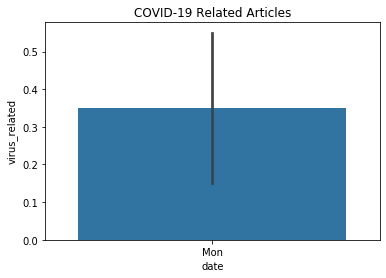

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='date', y='virus_related', data=techCrunch_df)
plt.title('COVID-19 Related Articles')
plt.show()